 ###### Riva Alessio

# <center> Wine Reviews Dataset </center>

Import libraries and dataset<br>
Wine dataset can be found [here](https://www.kaggle.com/datasets/zynicide/wine-reviews), it is used the csv file containing 130 000 wine reviews


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import string
import nltk
import re

In [2]:
df=pd.read_csv("data/winemag-data-130k-v2.csv", index_col=0)

In [3]:
print(" the shape of the dataframe is",df.shape,"'rows,column'")

 the shape of the dataframe is (129971, 13) 'rows,column'


The imported dataframe is composed by 129971 rows containin reviews of wines sold all around the world

In [4]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


##### The dataset is composed by 13 columns, as follow:
1. **country** : *the country of origin of the wine*
2. **description** : *the description/review of the wine*
3. **designation** : *where the wine's grapes are sourced*
4. **points** : *the number of points assinged to the wine*
5. **price** : *cost of a bottle of wine*
6. **province** : *province where the wine come from*
7. **region_1** : *wine growing area*
8. **region_2** : *more specific growing area*
9. **taster_name** : *name of the person who review the wine*
10. **taster_twitter_handle** : *twitter account of the taster*
11. **title** : *name of the wine*
12. **variety** : *grapes type used to make wine*
13. **winery** : *the winery that made the wine*

# <center>DATA CLEANING</center>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


```info()``` function is used to get a summary / quick overview of the dataframe.
It is possible to see that there are rows containing null values, using the functions ```isnull().sum()``` it is possible to retrive the exact number of null elements in each column

In [6]:
df.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [7]:
df=df.dropna(subset=["country","variety"])

In [8]:
df.isnull().sum()

country                      0
description                  0
designation              37453
points                       0
price                     8992
province                     0
region_1                 21183
region_2                 79396
taster_name              26243
taster_twitter_handle    31212
title                        0
variety                      0
winery                       0
dtype: int64

In [9]:
total=len(df)
missing_price=df["price"].isnull().sum()
missing_price_ratio= 100 - ((missing_price/total)*100)
print("remaining percentage of dataset if removing price",missing_price_ratio)

remaining percentage of dataset if removing price 93.07812512027836


If we remove the price null values we remain with 93% of dataset, so it is possible to drop also the price

In [10]:
df=df.dropna(subset=["price"])
df.isnull().sum()

country                      0
description                  0
designation              34767
points                       0
price                        0
province                     0
region_1                 19515
region_2                 70623
taster_name              24495
taster_twitter_handle    29415
title                        0
variety                      0
winery                       0
dtype: int64

Since the columns **region_1** and **region_2** are just a specification of **country** column we can keep the null values, also for the **tester_name** column, which can represent an anonymous tester. **tester_twitter_handle** not all tester have a twitter account.
these columns are not useful for the current project since the main objective is to predict the points assigned to a wine based on the description (review)

In [11]:
df["taster_name"]=df["taster_name"].fillna("anonymous")
df["taster_twitter_handle"]=df["taster_twitter_handle"].fillna("No Twitter Account")
df["region_1"]=df["region_1"].fillna("")
df["region_2"]=df["region_2"].fillna("")
df["designation"]=df["designation"].fillna("")
df.isnull().sum()

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

In [12]:
df.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,,Alexander Peartree,No Twitter Account,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [13]:
 #df_nodT=df.drop_duplicates(subset=["title"])

# <center>DATA VISUALIZATION and ANALYSIS</center>

In [14]:
df['points'].corr(df['price'])

0.416197136015331

The correlation between price and quality(points) is very low

<AxesSubplot:xlabel='points', ylabel='price'>

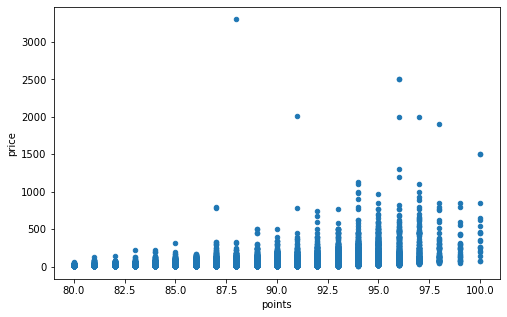

In [15]:
df.plot.scatter(x='points',y='price',figsize=(8,5))

From the previous table it is possible to see that there could be some outliers, one of them is ***Château Pétrus*** that is one of the most expensive wine in the world.

In [16]:
print("The most expensive wines are listed below")
df.loc[df['price'] > 1500]

The most expensive wines are listed below


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1558,France,"A massive wine for Margaux, packed with tannin...",,98,1900.0,Bordeaux,Margaux,,Roger Voss,@vossroger,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux
15840,France,The wine is a velvet glove in an iron fist. Th...,,96,2500.0,Bordeaux,Pomerol,,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
65352,France,This extravagantly perfumed wine has great jui...,,97,2000.0,Bordeaux,Pomerol,,Roger Voss,@vossroger,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus
80290,France,This ripe wine shows plenty of blackberry frui...,,88,3300.0,Bordeaux,Médoc,,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
98380,France,"A superb wine from a great year, this is power...",,96,2500.0,Burgundy,La Romanée,,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
113564,France,"A wonderfully complete wine, with all the elem...",,96,2000.0,Burgundy,La Romanée,,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair


In [17]:
print("Most expensive wine:")
df.loc[df["price"]==df["price"].max()]

Most expensive wine:


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,,88,3300.0,Bordeaux,Médoc,,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


NormaltestResult(statistic=625.6336114063824, pvalue=1.3976146247883177e-136)

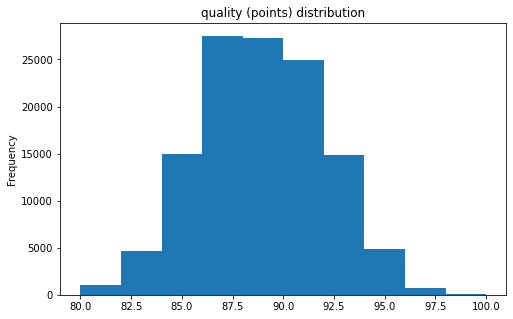

In [18]:
df['points'].plot.hist(title='quality (points) distribution', figsize=(8,5))
stats.normaltest(df["points"])

In [19]:
low_price_wine=df[df['price']<50]
high_price_wine=df[df['price']>250]

<AxesSubplot:title={'center':'quality (points) distribution of cheaper wines <50$'}, ylabel='Frequency'>

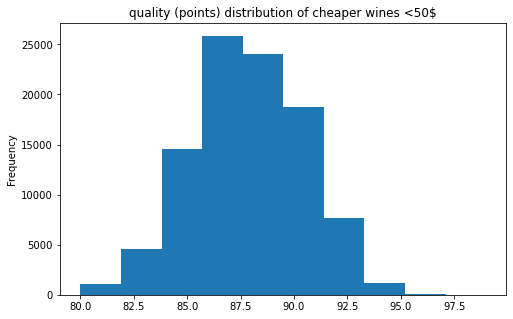

In [20]:
low_price_wine['points'].plot.hist(title='quality (points) distribution of cheaper wines <50$', figsize=(8,5))

<AxesSubplot:title={'center':'quality (points) distribution of expesnive wines >250$'}, ylabel='Frequency'>

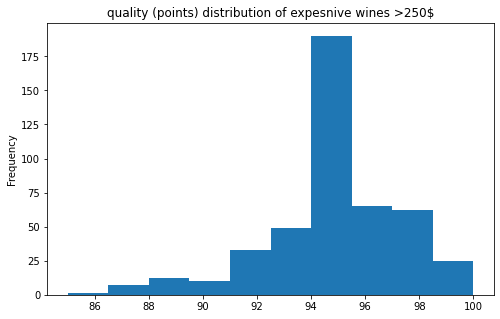

In [21]:
high_price_wine['points'].plot.hist(title='quality (points) distribution of expesnive wines >250$', figsize=(8,5))

<AxesSubplot:title={'center':'price distribution of cheaper wines <50$'}, ylabel='Frequency'>

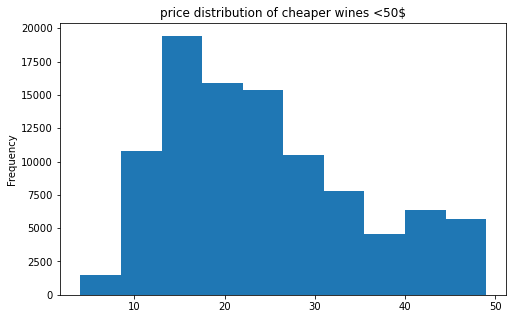

In [22]:
low_price_wine['price'].plot.hist(title='price distribution of cheaper wines <50$', figsize=(8,5))

<AxesSubplot:title={'center':'price distribution of expesnive wines >250$'}, ylabel='Frequency'>

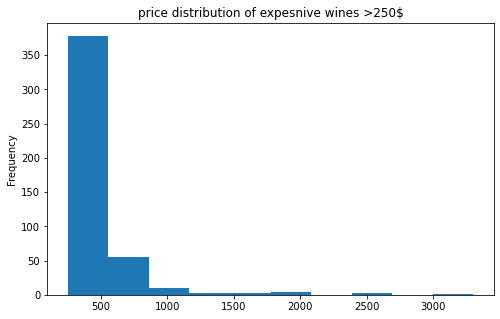

In [23]:
high_price_wine['price'].plot.hist(title='price distribution of expesnive wines >250$', figsize=(8,5))

In [24]:
df["country"].describe()

count     120915
unique        42
top           US
freq       54265
Name: country, dtype: object

There are 42 countries that are producing wine in the dataset, with the US with the highest numbers of reviews

In [25]:
print("Top wine variety for each country")
df.groupby(["country"]).variety.max()

Top wine variety for each country


country
Argentina                     White Blend
Armenia                              Rosé
Australia                       Zinfandel
Austria                          Zweigelt
Bosnia and Herzegovina             Vranec
Brazil                             Tannat
Bulgaria                      White Blend
Canada                        White Blend
Chile                         White Blend
China                      Cabernet Blend
Croatia                          Zweigelt
Cyprus                          Xynisteri
Czech Republic             Welschriesling
England                       White Blend
France                        White Blend
Georgia                       White Blend
Germany                       White Blend
Greece                          Xinomavro
Hungary                       White Blend
India                              Shiraz
Israel                     White Riesling
Italy                             Zibibbo
Lebanon                       White Blend
Luxembourg                

In [26]:
print("Total number of wines, with Minimum and Maximum score for each country")
df.groupby(["country"]).points.agg([len, min, max])

Total number of wines, with Minimum and Maximum score for each country


,len,min,max
country,,,
Argentina,3756,80,97
Armenia,2,87,88
Australia,2294,80,100
Austria,2799,82,97
Bosnia and Herzegovina,2,85,88
Brazil,47,80,89
Bulgaria,141,80,91
Canada,254,82,94
Chile,4415,80,95


In [27]:
print("Minimun and Maximum price for wines grouped by country")
df.groupby(["country"]).price.agg([min, max])

Minimun and Maximum price for wines grouped by country


,min,max
country,,
Argentina,4.0,230.0
Armenia,14.0,15.0
Australia,5.0,850.0
Austria,7.0,1100.0
Bosnia and Herzegovina,12.0,13.0
Brazil,10.0,60.0
Bulgaria,8.0,100.0
Canada,12.0,120.0
Chile,5.0,400.0


From the next tables it is possible to see the **mean price** for wines in each country, and the **mean points** assigned to wines grouped by countries

Text(0.5, 1.0, 'Mean price per Country')

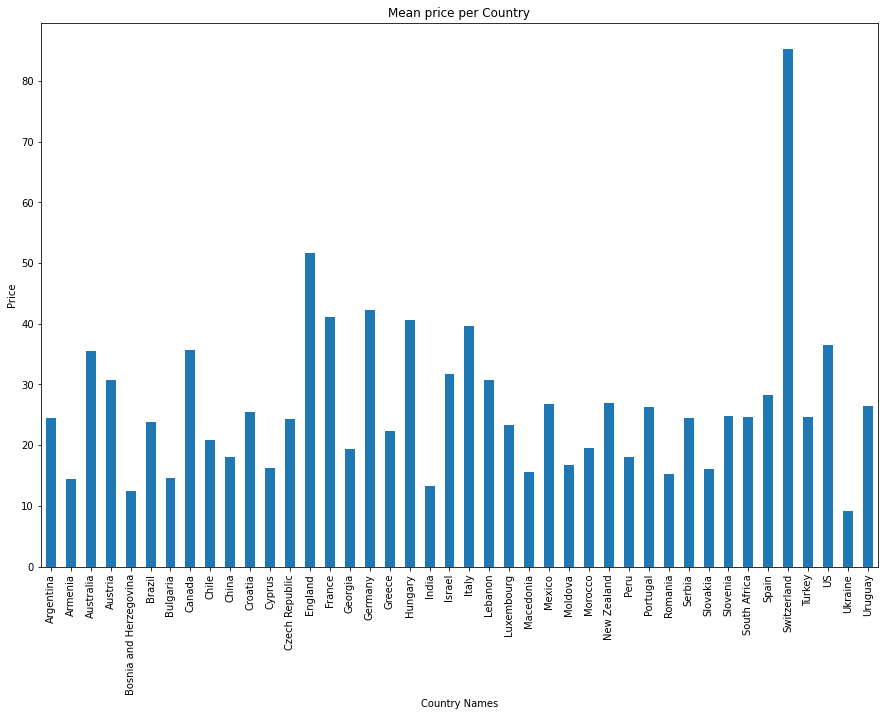

In [28]:
from matplotlib.pyplot import figure
figure(figsize=(15,10))
df.groupby(df["country"])["price"].mean().plot.bar()
plt.xlabel("Country Names")
plt.ylabel("Price")
plt.title("Mean price per Country")

Text(0.5, 1.0, 'Mean points per Country')

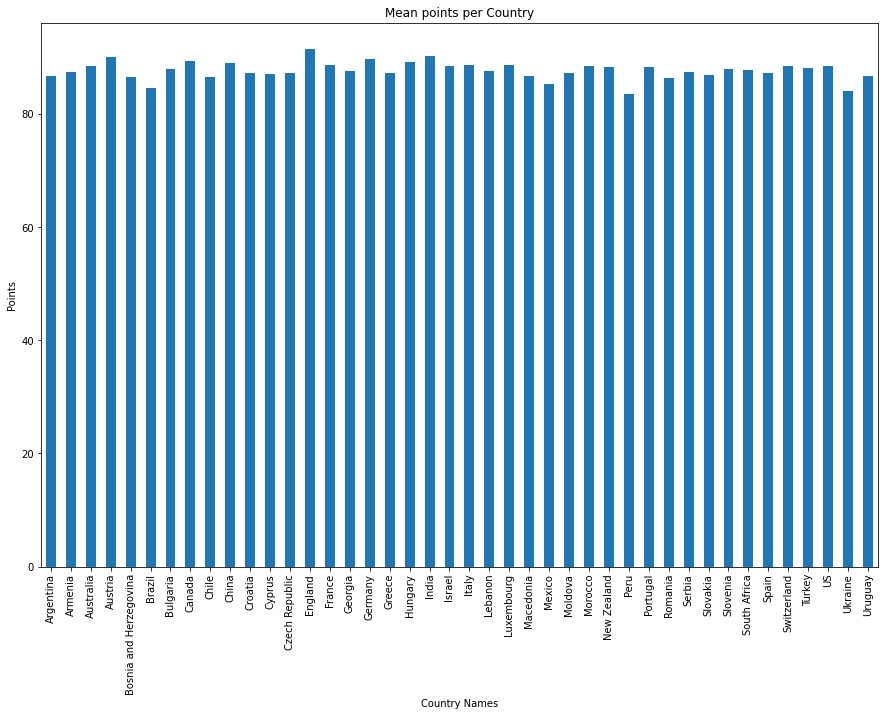

In [29]:
from matplotlib.pyplot import figure
figure(figsize=(15,10))
df.groupby(df["country"])["points"].mean().plot.bar()
plt.xlabel("Country Names")
plt.ylabel("Points")
plt.title("Mean points per Country")

In [30]:
print("Top 10 wine variety")
df["variety"].value_counts()[:10]

Top 10 wine variety


Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Name: variety, dtype: int64

# <center>Prediction</center>

Preparing the dataset

In [31]:
df.iloc[0,1]

"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016."

##### Tokenization-Filtering stopwords and Punctuation-Lemmatizing

1. Tokenization used to split reviews into single words
2. After tokenization the words that are present in the english stopword list are removed from the set along with punctuation
3. Finally, each word is lemmatized to determine its part of speech

In [32]:
%%time
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import WordNetLemmatizer

#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')



wnl = WordNetLemmatizer()

def cleanAll(cel):
    #cel=re.findall(r"[\w']+|[.,!?;]", cel)
    cel=cel.lower()
    cel=word_tokenize(cel)
    cel = [w for w in cel if w not in stopwords.words('english')]
    cel = [w for w in cel if w not in string.punctuation and w not in punct_combo]
    #cel=[snowball.stem(w) for w in cel]
    cel=[wnl.lemmatize(w) for w in cel]
    
    return cel

punct_combo = [c + "\"" for c in string.punctuation ] + ["\"" + c for c in string.punctuation] + [".-", ":-", "..", "..."]
newDescription=df["description"].apply(cleanAll)
print(newDescription)

1         [ripe, fruity, wine, smooth, still, structured...
2         [tart, snappy, flavor, lime, flesh, rind, domi...
3         [pineapple, rind, lemon, pith, orange, blossom...
4         [much, like, regular, bottling, 2012, come, ac...
5         [blackberry, raspberry, aroma, show, typical, ...
                                ...                        
129966    [note, honeysuckle, cantaloupe, sweeten, delic...
129967    [citation, given, much, decade, bottle, age, p...
129968    [well-drained, gravel, soil, give, wine, crisp...
129969    [dry, style, pinot, gris, crisp, acidity, also...
129970    [big, rich, off-dry, powered, intense, spicine...
Name: description, Length: 120915, dtype: object
Wall time: 16min 33s


##### word occurencies vectorization
```vec.fit_transform()```Learn the vocabulary dictionary and return document-term matrix

In [33]:
%%time

def concatenateList(cel):
    return ' '.join(cel)

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words="english")
#print(df.iloc[0,1])
newDescriptionConcat=newDescription.apply(concatenateList)
print(len(newDescription))
X = vec.fit_transform(newDescriptionConcat)

print(X.shape)
print(len(newDescriptionConcat))
#print(vec.get_feature_names())
print(X)

120915
(120915, 27872)
120915
  (0, 20727)	1
  (0, 10367)	1
  (0, 27411)	1
  (0, 22698)	1
  (0, 23679)	1
  (0, 9695)	1
  (0, 24477)	1
  (0, 9611)	1
  (0, 13247)	1
  (0, 20065)	1
  (0, 2829)	1
  (0, 10351)	1
  (0, 10268)	1
  (0, 777)	1
  (0, 7980)	1
  (0, 4745)	1
  (0, 2857)	1
  (0, 321)	1
  (1, 27411)	1
  (1, 777)	1
  (1, 24540)	1
  (1, 22726)	1
  (1, 9792)	2
  (1, 14192)	1
  (1, 9821)	1
  :	:
  (120913, 319)	1
  (120913, 6248)	1
  (120913, 11354)	1
  (120913, 22825)	1
  (120913, 18991)	1
  (120913, 16538)	1
  (120913, 7406)	1
  (120913, 999)	1
  (120914, 10351)	1
  (120914, 7797)	1
  (120914, 17250)	1
  (120914, 10881)	1
  (120914, 8021)	1
  (120914, 24820)	1
  (120914, 7977)	1
  (120914, 992)	1
  (120914, 20636)	1
  (120914, 9439)	1
  (120914, 19288)	1
  (120914, 12724)	1
  (120914, 14637)	1
  (120914, 21025)	1
  (120914, 2902)	1
  (120914, 23076)	1
  (120914, 18990)	1
Wall time: 2.24 s


##### split dataset for cross validation<br>
KFold provides train/test indices to split data in train/test sets by splitting dataset into K folds, 10 in this case. Each fold is used once as test while the remaining folds are used for training<br>
```.tocsr() ``` Convert matrix to Compressed Sparse Row format

In [34]:
#%%time
#print(np.mean(prediction-df["points"][-100:]))

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

Xp=X.tocsr() #np.array(X.toarray())   
kf=KFold(n_splits=10)
kf.get_n_splits(Xp)
outcome=np.array(df["points"])

## <center>Decision Tree Regressor</center>

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

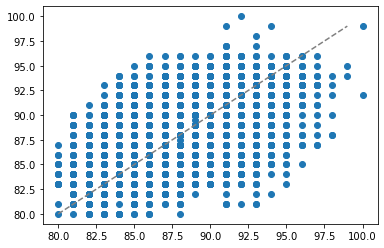

Iteration number  1 normalized RMSE= 0.13496999519538902
R^2 on test set: 0.20074175375816639


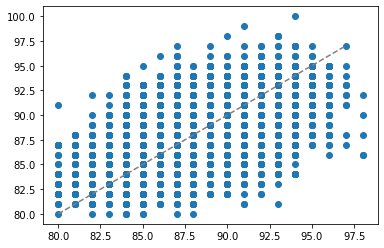

Iteration number  2 normalized RMSE= 0.13275949193675504
R^2 on test set: 0.21618607042419968


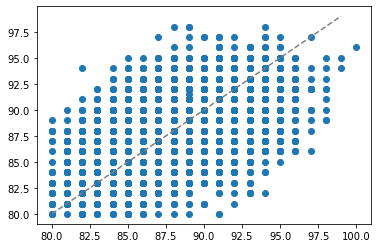

Iteration number  3 normalized RMSE= 0.13455327424108893
R^2 on test set: 0.21306135459665787


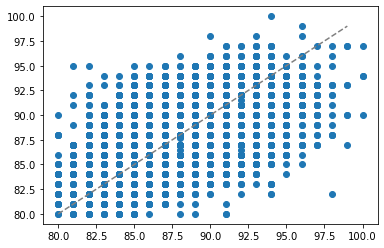

Iteration number  4 normalized RMSE= 0.1386962749925389
R^2 on test set: 0.2528420329442539


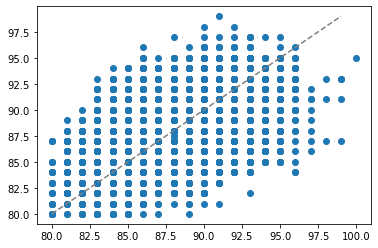

Iteration number  5 normalized RMSE= 0.13299094069763331
R^2 on test set: 0.17199348463134645


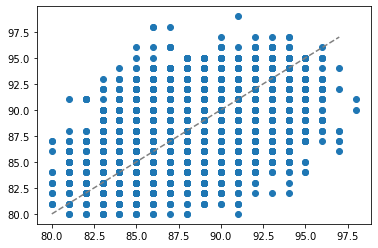

Iteration number  6 normalized RMSE= 0.13412384891609996
R^2 on test set: 0.08297106655137809


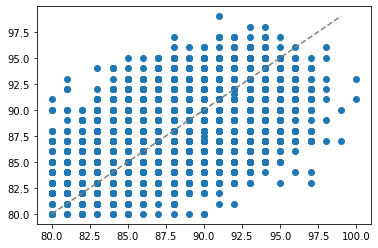

Iteration number  7 normalized RMSE= 0.1368150755564314
R^2 on test set: 0.21679487433534284


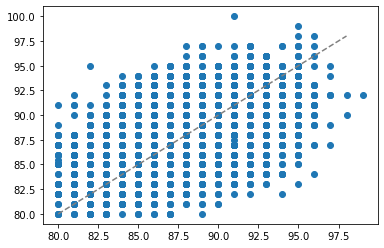

Iteration number  8 normalized RMSE= 0.13628813670711104
R^2 on test set: 0.2043504107245081


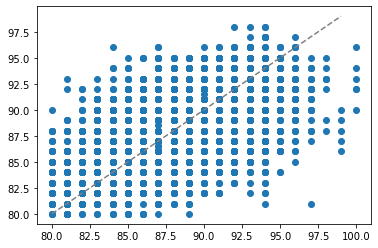

Iteration number  9 normalized RMSE= 0.13591022933969918
R^2 on test set: 0.2189164699199454


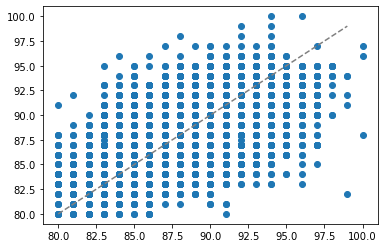

Iteration number  10 normalized RMSE= 0.13681885369467678
R^2 on test set: 0.26363293340079685
Wall time: 18min 11s


In [35]:
%%time

from sklearn import tree

#fig, axs = plt.subplots(10)

i=0
for train_index, test_index in kf.split(Xp):
    traindf=Xp[train_index]
    testdf=Xp[test_index]
    label_train=outcome[train_index]
    label_test=outcome[test_index]
    decTree=tree.DecisionTreeRegressor()
    decTree=decTree.fit(traindf, label_train)
    prediction=decTree.predict(testdf)
    error_rate=mean_squared_error(label_test,prediction, squared=False)/(max(outcome)-min(outcome))
    #axs[i].scatter(label_test,prediction)
    plt.figure()
    plt.scatter(label_test,prediction)
    plt.plot(range(int(np.ceil(min(label_test))),int(np.ceil(max(label_test)))),range(int(np.ceil(min(label_test))),int(np.ceil(max(label_test)))),"--", c="gray")
    plt.show()   
    print("Iteration number ",i+1,"normalized RMSE=",error_rate)
    print("R^2 on test set:",decTree.score(testdf, label_test))
    i+=1
    


## <center>Random Forest Regressor</center>

Random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the ```max_samples```, otherwise the whole dataset is used to build each tree.<br>
 ```max_features```: The number of features to consider when looking for the best split. In this case sqrt, then  ```max_features=sqrt(n_features) ```<br>
```n_estimators```: The number of trees in the forest

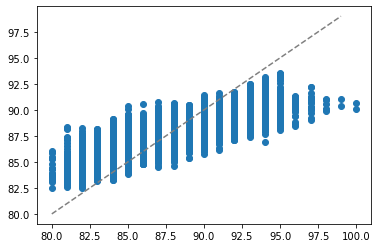

Iteration number  1 normalized RMSE= 0.09690068228387665
R^2 on test set: 0.5880292986943987


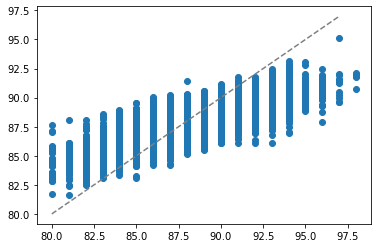

Iteration number  2 normalized RMSE= 0.09713231002248433
R^2 on test set: 0.5804253426754888


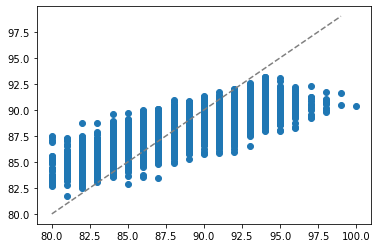

Iteration number  3 normalized RMSE= 0.0982961926497061
R^2 on test set: 0.580022788725879


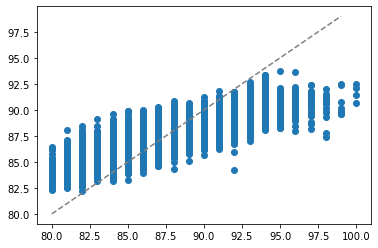

Iteration number  4 normalized RMSE= 0.1040379994531629
R^2 on test set: 0.5795960166263681


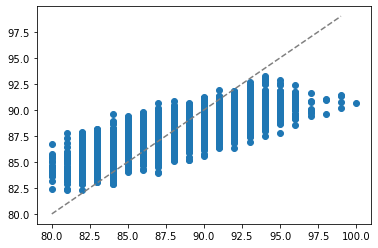

Iteration number  5 normalized RMSE= 0.09395460312217499
R^2 on test set: 0.5867377242371701


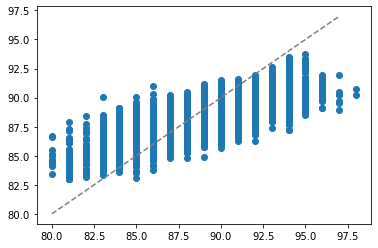

Iteration number  6 normalized RMSE= 0.09224711194361479
R^2 on test set: 0.5662129533590885


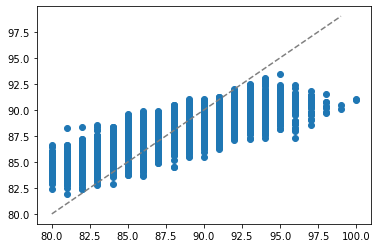

Iteration number  7 normalized RMSE= 0.10136892613630451
R^2 on test set: 0.5700506434571267


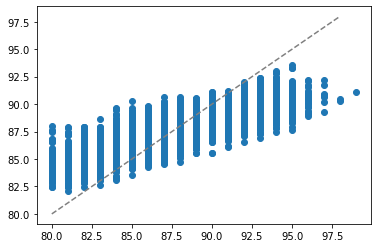

Iteration number  8 normalized RMSE= 0.0983587023464503
R^2 on test set: 0.5855889608208067


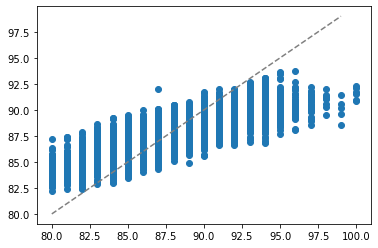

Iteration number  9 normalized RMSE= 0.0982892246842261
R^2 on test set: 0.5914878213106747


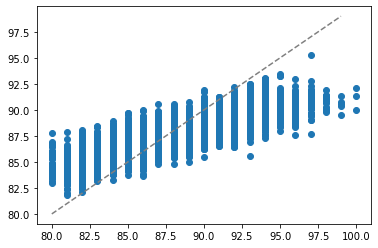

Iteration number  10 normalized RMSE= 0.10343722422408312
R^2 on test set: 0.5791220465280968
Wall time: 18min 51s


In [36]:
%%time

from sklearn.ensemble import RandomForestRegressor

i=0
for train_index, test_index in kf.split(Xp):
    traindf=Xp[train_index]
    testdf=Xp[test_index]
    label_train=outcome[train_index]
    label_test=outcome[test_index]
    randFor=RandomForestRegressor(max_features="sqrt", n_jobs=8, n_estimators=150)
    ranfFor=randFor.fit(traindf, label_train)
    prediction=randFor.predict(testdf)
    error_rate=mean_squared_error(label_test,prediction, squared=False)/(max(outcome)-min(outcome))
    #axs[i].scatter(label_test,prediction)
    plt.figure()
    plt.scatter(label_test,prediction)
    plt.plot(range(int(np.ceil(min(label_test))),int(np.ceil(max(label_test)))),range(int(np.ceil(min(label_test))),int(np.ceil(max(label_test)))),"--", c="gray")
    plt.show()
    print("Iteration number ",i+1,"normalized RMSE=",error_rate)
    print("R^2 on test set:",randFor.score(testdf, label_test))
    i+=1

## <center>Knn Regressor</center>

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning).<br>
to weight points such that nearby points contribute more to the regression than faraway points. This can be accomplished through the ```weights``` keyword. The default value, ```weights = 'uniform'```, assigns equal weights to all points. ```weights = 'distance'``` assigns weights proportional to the inverse of the distance from the query point.

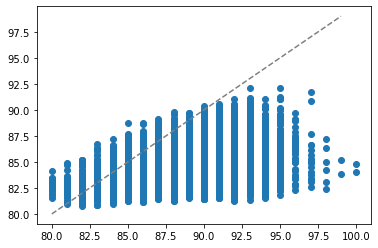

Iteration number  1 normalized RMSE= 0.242125803861957
R^2 on test set: -1.5721412366615124


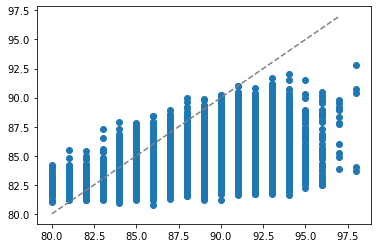

Iteration number  2 normalized RMSE= 0.24289445327485432
R^2 on test set: -1.6237171171021338


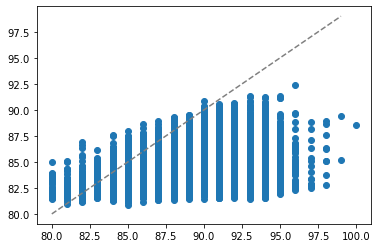

Iteration number  3 normalized RMSE= 0.24893931456366708
R^2 on test set: -1.69363850386434


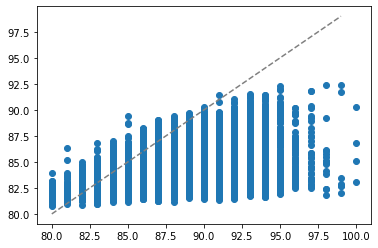

Iteration number  4 normalized RMSE= 0.2547465425531269
R^2 on test set: -1.520573895302023


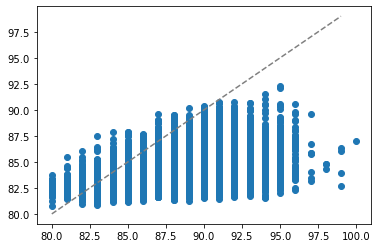

Iteration number  5 normalized RMSE= 0.2368145216854564
R^2 on test set: -1.625465396179513


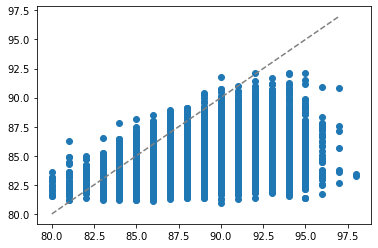

Iteration number  6 normalized RMSE= 0.23794693374810633
R^2 on test set: -1.8862320724801083


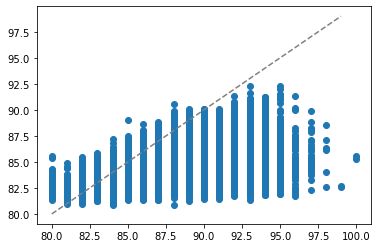

Iteration number  7 normalized RMSE= 0.25079141130123717
R^2 on test set: -1.6316790947620472


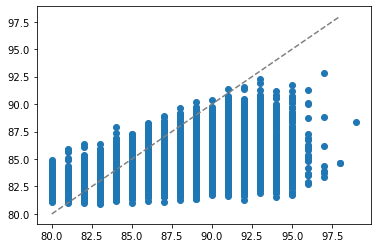

Iteration number  8 normalized RMSE= 0.2260727283523444
R^2 on test set: -1.1892839142735405


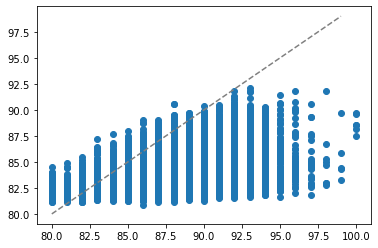

Iteration number  9 normalized RMSE= 0.23793958661358353
R^2 on test set: -1.3940135005335974


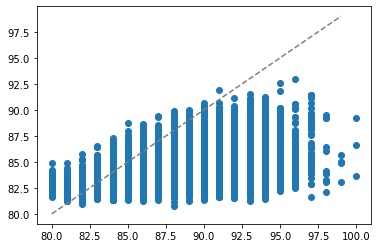

Iteration number  10 normalized RMSE= 0.24906436446465624
R^2 on test set: -1.4402012777718087


In [37]:
from sklearn.neighbors import KNeighborsRegressor

i=0
for train_index, test_index in kf.split(Xp):
    traindf=Xp[train_index]
    testdf=Xp[test_index]
    label_train=outcome[train_index]
    label_test=outcome[test_index]
    knn=KNeighborsRegressor(n_neighbors=10)
    knn=knn.fit(traindf, label_train)
    prediction=knn.predict(testdf)
    error_rate=mean_squared_error(label_test,prediction, squared=False)/(max(outcome)-min(outcome))
    #axs[i].scatter(label_test,prediction)
    plt.figure()
    plt.scatter(label_test,prediction)
    plt.plot(range(int(np.ceil(min(label_test))),int(np.ceil(max(label_test)))),range(int(np.ceil(min(label_test))),int(np.ceil(max(label_test)))),"--", c="gray")
    plt.show()
    print("Iteration number ",i+1,"normalized RMSE=",error_rate)
    print("R^2 on test set:",knn.score(testdf, label_test))
    i+=1

Knn with ```weights``` set to ```'distance'```

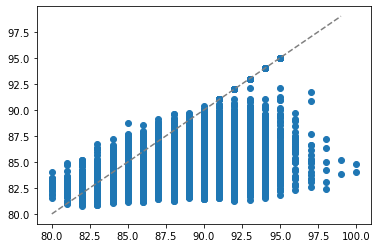

Iteration number  1 normalized RMSE= 0.22946639126432894
R^2 on test set: -1.3102066640772936


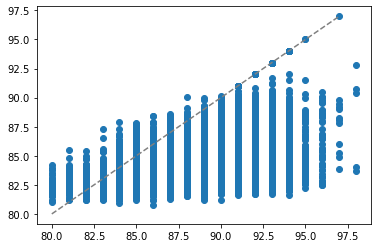

Iteration number  2 normalized RMSE= 0.23085765268000907
R^2 on test set: -1.37012016282431


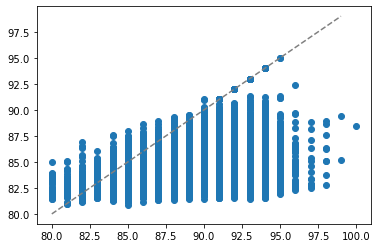

Iteration number  3 normalized RMSE= 0.2358799029065221
R^2 on test set: -1.418433851971618


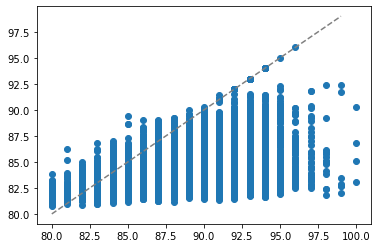

Iteration number  4 normalized RMSE= 0.24151584371981727
R^2 on test set: -1.2655522868330196


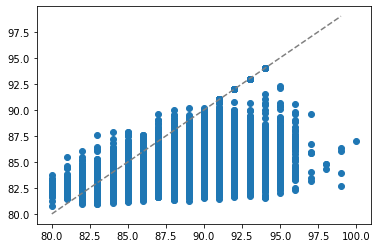

Iteration number  5 normalized RMSE= 0.22241591679254746
R^2 on test set: -1.3159083322783354


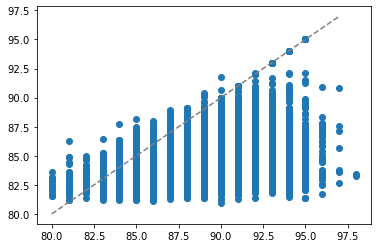

Iteration number  6 normalized RMSE= 0.22523556956811105
R^2 on test set: -1.5860979801311252


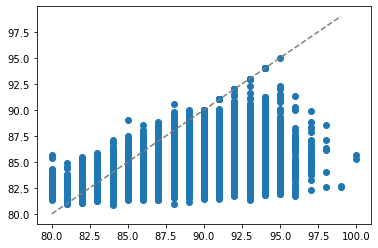

Iteration number  7 normalized RMSE= 0.2390074099996912
R^2 on test set: -1.3901785419322015


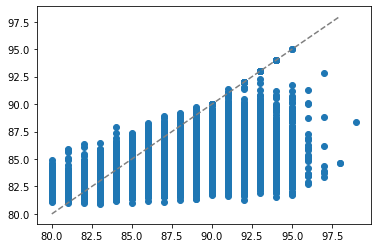

Iteration number  8 normalized RMSE= 0.21440414515532638
R^2 on test set: -0.969119576445761


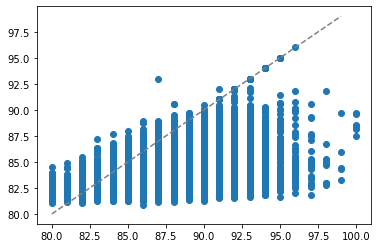

Iteration number  9 normalized RMSE= 0.22583839914368847
R^2 on test set: -1.1566951567384196


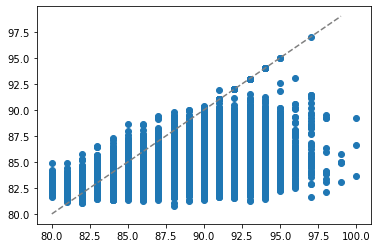

Iteration number  10 normalized RMSE= 0.23705213388043928
R^2 on test set: -1.2104983752409724


In [39]:
from sklearn.neighbors import KNeighborsRegressor

i=0
for train_index, test_index in kf.split(Xp):
    traindf=Xp[train_index]
    testdf=Xp[test_index]
    label_train=outcome[train_index]
    label_test=outcome[test_index]
    knn=KNeighborsRegressor(n_neighbors=10, weights='distance')
    knn=knn.fit(traindf, label_train)
    prediction=knn.predict(testdf)
    error_rate=mean_squared_error(label_test,prediction, squared=False)/(max(outcome)-min(outcome))
    #axs[i].scatter(label_test,prediction)
    plt.figure()
    plt.scatter(label_test,prediction)
    plt.plot(range(int(np.ceil(min(label_test))),int(np.ceil(max(label_test)))),range(int(np.ceil(min(label_test))),int(np.ceil(max(label_test)))),"--", c="gray")
    plt.show()
    print("Iteration number ",i+1,"normalized RMSE=",error_rate)
    print("R^2 on test set:",knn.score(testdf, label_test))
    i+=1

## <center>Artificial Neural Network</center>

Keras Artifical neural network, wrapper interface for tensorflow, sequential model. Composed by 2 hidden layers 100 and 70 nodes respectively. Activation function rectified linear unit. Gradient descent adam. Loss function mean squared error<br>
20 epochs are used for training (to reach a mse <= 2 on train set) and batch size = 100 (points used in each train iteration) 

Epoch 1/20
1089/1089 [==============================] - 10s 9ms/step - loss: 317.1761 - mean_squared_error: 317.1761
Epoch 2/20
1089/1089 [==============================] - 9s 9ms/step - loss: 8.3807 - mean_squared_error: 8.3807
Epoch 3/20
1089/1089 [==============================] - 10s 9ms/step - loss: 6.0538 - mean_squared_error: 6.0538
Epoch 4/20
1089/1089 [==============================] - 10s 9ms/step - loss: 5.3747 - mean_squared_error: 5.3747
Epoch 5/20
1089/1089 [==============================] - 10s 9ms/step - loss: 4.8343 - mean_squared_error: 4.8343
Epoch 6/20
1089/1089 [==============================] - 10s 9ms/step - loss: 4.4771 - mean_squared_error: 4.4771
Epoch 7/20
1089/1089 [==============================] - 10s 9ms/step - loss: 3.9708 - mean_squared_error: 3.9708
Epoch 8/20
1089/1089 [==============================] - 9s 9ms/step - loss: 3.7245 - mean_squared_error: 3.7245
Epoch 9/20
1089/1089 [==============================] - 9s 8ms/step - loss: 3.4203 - mean_squa

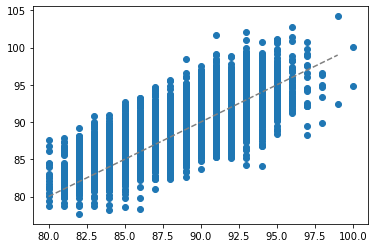

Iteration number  1 normalized RMSE= 0.10628181499085673
R^2 on test set: 0.5044008127133763
Epoch 1/20
1089/1089 [==============================] - 10s 9ms/step - loss: 316.2252 - mean_squared_error: 316.2252
Epoch 2/20
1089/1089 [==============================] - 9s 9ms/step - loss: 8.5506 - mean_squared_error: 8.5506
Epoch 3/20
1089/1089 [==============================] - 10s 10ms/step - loss: 6.2539 - mean_squared_error: 6.2539
Epoch 4/20
1089/1089 [==============================] - 11s 11ms/step - loss: 5.4913 - mean_squared_error: 5.4913
Epoch 5/20
1089/1089 [==============================] - 10s 9ms/step - loss: 4.9664 - mean_squared_error: 4.9664
Epoch 6/20
1089/1089 [==============================] - 10s 9ms/step - loss: 4.4943 - mean_squared_error: 4.4943
Epoch 7/20
1089/1089 [==============================] - 9s 9ms/step - loss: 4.0961 - mean_squared_error: 4.0961
Epoch 8/20
1089/1089 [==============================] - 10s 9ms/step - loss: 3.6494 - mean_squared_error: 3.6494

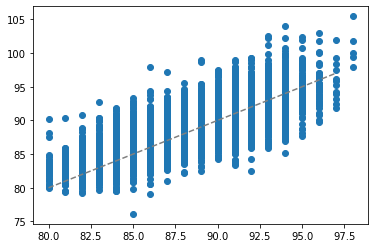

Iteration number  2 normalized RMSE= 0.10768971595119543
R^2 on test set: 0.48426064030433946
Epoch 1/20
1089/1089 [==============================] - 9s 8ms/step - loss: 321.5512 - mean_squared_error: 321.5512
Epoch 2/20
1089/1089 [==============================] - 9s 9ms/step - loss: 8.5292 - mean_squared_error: 8.5292
Epoch 3/20
1089/1089 [==============================] - 9s 9ms/step - loss: 5.9752 - mean_squared_error: 5.9752
Epoch 4/20
1089/1089 [==============================] - 9s 9ms/step - loss: 5.0774 - mean_squared_error: 5.0774
Epoch 5/20
1089/1089 [==============================] - 9s 9ms/step - loss: 4.5454 - mean_squared_error: 4.5454
Epoch 6/20
1089/1089 [==============================] - 9s 9ms/step - loss: 4.2258 - mean_squared_error: 4.2258
Epoch 7/20
1089/1089 [==============================] - 9s 9ms/step - loss: 3.8292 - mean_squared_error: 3.8292
Epoch 8/20
1089/1089 [==============================] - 9s 8ms/step - loss: 3.3891 - mean_squared_error: 3.3891
Epoch 

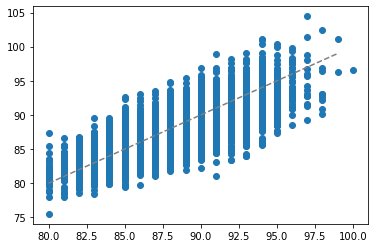

Iteration number  3 normalized RMSE= 0.10243674376732112
R^2 on test set: 0.5438960198288746
Epoch 1/20
1089/1089 [==============================] - 10s 9ms/step - loss: 310.0310 - mean_squared_error: 310.0310
Epoch 2/20
1089/1089 [==============================] - 10s 9ms/step - loss: 8.7246 - mean_squared_error: 8.7246
Epoch 3/20
1089/1089 [==============================] - 10s 9ms/step - loss: 6.0022 - mean_squared_error: 6.0022
Epoch 4/20
1089/1089 [==============================] - 9s 9ms/step - loss: 5.2883 - mean_squared_error: 5.2883
Epoch 5/20
1089/1089 [==============================] - 10s 9ms/step - loss: 4.8761 - mean_squared_error: 4.8761
Epoch 6/20
1089/1089 [==============================] - 9s 9ms/step - loss: 4.4254 - mean_squared_error: 4.4254
Epoch 7/20
1089/1089 [==============================] - 9s 8ms/step - loss: 4.0494 - mean_squared_error: 4.0494
Epoch 8/20
1089/1089 [==============================] - 9s 8ms/step - loss: 3.6497 - mean_squared_error: 3.6497
Epo

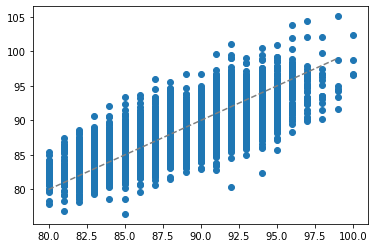

Iteration number  4 normalized RMSE= 0.10279537342421677
R^2 on test set: 0.5895786218767172
Epoch 1/20
1089/1089 [==============================] - 10s 9ms/step - loss: 341.3841 - mean_squared_error: 341.3841
Epoch 2/20
1089/1089 [==============================] - 9s 9ms/step - loss: 8.4417 - mean_squared_error: 8.4417
Epoch 3/20
1089/1089 [==============================] - 9s 8ms/step - loss: 6.2424 - mean_squared_error: 6.2424
Epoch 4/20
1089/1089 [==============================] - 9s 8ms/step - loss: 5.5138 - mean_squared_error: 5.5138
Epoch 5/20
1089/1089 [==============================] - 9s 8ms/step - loss: 4.9113 - mean_squared_error: 4.9113
Epoch 6/20
1089/1089 [==============================] - 9s 9ms/step - loss: 4.4862 - mean_squared_error: 4.4862
Epoch 7/20
1089/1089 [==============================] - 9s 9ms/step - loss: 3.9990 - mean_squared_error: 3.9990
Epoch 8/20
1089/1089 [==============================] - 9s 9ms/step - loss: 3.6598 - mean_squared_error: 3.6598
Epoch 

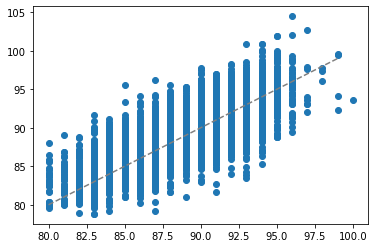

Iteration number  5 normalized RMSE= 0.10255987034096758
R^2 on test set: 0.5075699306538977
Epoch 1/20
1089/1089 [==============================] - 10s 10ms/step - loss: 297.0642 - mean_squared_error: 297.0642
Epoch 2/20
1089/1089 [==============================] - 10s 9ms/step - loss: 8.8234 - mean_squared_error: 8.8234
Epoch 3/20
1089/1089 [==============================] - 10s 9ms/step - loss: 6.1409 - mean_squared_error: 6.1409
Epoch 4/20
1089/1089 [==============================] - 10s 9ms/step - loss: 5.2875 - mean_squared_error: 5.2875
Epoch 5/20
1089/1089 [==============================] - 10s 9ms/step - loss: 4.7937 - mean_squared_error: 4.7937
Epoch 6/20
1089/1089 [==============================] - 10s 9ms/step - loss: 4.3117 - mean_squared_error: 4.3117
Epoch 7/20
1089/1089 [==============================] - 10s 9ms/step - loss: 3.8214 - mean_squared_error: 3.8214
Epoch 8/20
1089/1089 [==============================] - 10s 9ms/step - loss: 3.5270 - mean_squared_error: 3.527

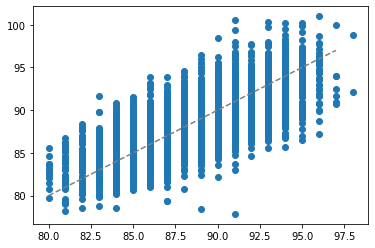

Iteration number  6 normalized RMSE= 0.09750574922828462
R^2 on test set: 0.5153463694517448
Epoch 1/20
1089/1089 [==============================] - 9s 9ms/step - loss: 298.6149 - mean_squared_error: 298.6149
Epoch 2/20
1089/1089 [==============================] - 10s 9ms/step - loss: 9.0845 - mean_squared_error: 9.0845
Epoch 3/20
1089/1089 [==============================] - 9s 9ms/step - loss: 6.3606 - mean_squared_error: 6.3606
Epoch 4/20
1089/1089 [==============================] - 9s 8ms/step - loss: 5.5377 - mean_squared_error: 5.5377
Epoch 5/20
1089/1089 [==============================] - 9s 8ms/step - loss: 5.0183 - mean_squared_error: 5.0183
Epoch 6/20
1089/1089 [==============================] - 9s 8ms/step - loss: 4.4600 - mean_squared_error: 4.4600
Epoch 7/20
1089/1089 [==============================] - 9s 9ms/step - loss: 4.0788 - mean_squared_error: 4.0788
Epoch 8/20
1089/1089 [==============================] - 9s 9ms/step - loss: 3.7184 - mean_squared_error: 3.7184
Epoch 

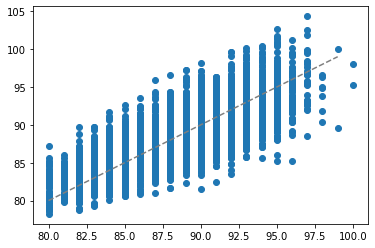

Iteration number  7 normalized RMSE= 0.10264468769691666
R^2 on test set: 0.5591604329895976
Epoch 1/20
1089/1089 [==============================] - 9s 8ms/step - loss: 305.9043 - mean_squared_error: 305.9043
Epoch 2/20
1089/1089 [==============================] - 9s 9ms/step - loss: 8.6583 - mean_squared_error: 8.6583
Epoch 3/20
1089/1089 [==============================] - 9s 9ms/step - loss: 6.0145 - mean_squared_error: 6.0145
Epoch 4/20
1089/1089 [==============================] - 9s 9ms/step - loss: 5.2589 - mean_squared_error: 5.2589
Epoch 5/20
1089/1089 [==============================] - 9s 9ms/step - loss: 4.7627 - mean_squared_error: 4.7627
Epoch 6/20
1089/1089 [==============================] - 9s 8ms/step - loss: 4.2488 - mean_squared_error: 4.2488
Epoch 7/20
1089/1089 [==============================] - 9s 9ms/step - loss: 3.7772 - mean_squared_error: 3.7772
Epoch 8/20
1089/1089 [==============================] - 10s 9ms/step - loss: 3.4304 - mean_squared_error: 3.4304
Epoch 

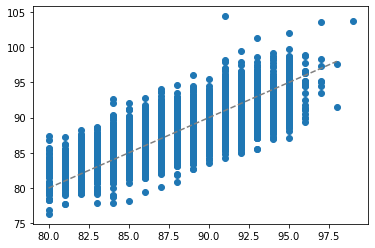

Iteration number  8 normalized RMSE= 0.09664780888176948
R^2 on test set: 0.5998804608610784
Epoch 1/20
1089/1089 [==============================] - 9s 8ms/step - loss: 309.9130 - mean_squared_error: 309.9130
Epoch 2/20
1089/1089 [==============================] - 10s 9ms/step - loss: 8.7298 - mean_squared_error: 8.7298
Epoch 3/20
1089/1089 [==============================] - 9s 9ms/step - loss: 6.0895 - mean_squared_error: 6.0895
Epoch 4/20
1089/1089 [==============================] - 9s 9ms/step - loss: 5.3197 - mean_squared_error: 5.3197
Epoch 5/20
1089/1089 [==============================] - 9s 8ms/step - loss: 4.9370 - mean_squared_error: 4.9370
Epoch 6/20
1089/1089 [==============================] - 9s 8ms/step - loss: 4.3255 - mean_squared_error: 4.3255
Epoch 7/20
1089/1089 [==============================] - 11s 10ms/step - loss: 3.9720 - mean_squared_error: 3.9720
Epoch 8/20
1089/1089 [==============================] - 10s 9ms/step - loss: 3.4990 - mean_squared_error: 3.4990
Epo

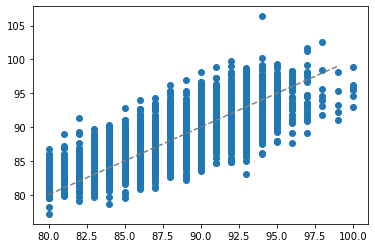

Iteration number  9 normalized RMSE= 0.09650663984331234
R^2 on test set: 0.6061711030284196
Epoch 1/20
1089/1089 [==============================] - 9s 9ms/step - loss: 310.9627 - mean_squared_error: 310.9627
Epoch 2/20
1089/1089 [==============================] - 9s 9ms/step - loss: 7.6908 - mean_squared_error: 7.6908
Epoch 3/20
1089/1089 [==============================] - 9s 9ms/step - loss: 5.3438 - mean_squared_error: 5.3438
Epoch 4/20
1089/1089 [==============================] - 9s 8ms/step - loss: 4.8230 - mean_squared_error: 4.8230
Epoch 5/20
1089/1089 [==============================] - 9s 9ms/step - loss: 4.3620 - mean_squared_error: 4.3620
Epoch 6/20
1089/1089 [==============================] - 9s 8ms/step - loss: 3.9429 - mean_squared_error: 3.9429
Epoch 7/20
1089/1089 [==============================] - 9s 8ms/step - loss: 3.4655 - mean_squared_error: 3.4655
Epoch 8/20
1089/1089 [==============================] - 9s 8ms/step - loss: 3.1645 - mean_squared_error: 3.1645
Epoch 9

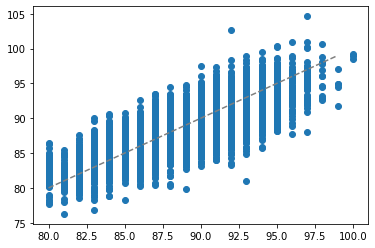

Iteration number  10 normalized RMSE= 0.10186735784472825
R^2 on test set: 0.5918004273537387


In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
import tensorflow as tf
from sklearn.metrics import r2_score

i=0
#Xa=X.sort_indices()
Xa=X.copy()
Xa.sort_indices()
for train_index, test_index in kf.split(Xa):
    traindf=Xa[train_index]
    testdf=Xa[test_index]
    label_train=outcome[train_index]
    label_test=outcome[test_index]
    
    tf.keras.backend.clear_session()
    ann=Sequential()
    ann.add(Dense(units=100, input_dim=traindf.shape[1], activation="relu"))
    ann.add(Dense(units=100, activation="relu"))
    ann.add(Dense(units=70, activation="relu"))
    ann.add(Dense(1))
    ann.compile(optimizer="adam",loss="mean_squared_error",metrics=[metrics.mean_squared_error])
    history=ann.fit(traindf, label_train, epochs=20, batch_size=100)
    prediction=ann.predict(testdf)
    error_rate=mean_squared_error(label_test,prediction, squared=False)/(max(outcome)-min(outcome))
    #axs[i].scatter(label_test,prediction)
    plt.figure()
    plt.scatter(label_test,prediction)
    plt.plot(range(int(np.ceil(min(label_test))),int(np.ceil(max(label_test)))),range(int(np.ceil(min(label_test))),int(np.ceil(max(label_test)))),"--", c="gray")
    plt.show()
    print("Iteration number ",i+1,"normalized RMSE=",error_rate)
    print("R^2 on test set:",r2_score(label_test,prediction))
    i+=1

# <center>CONCLUSION</center>

This project aims to present a model to predict a score given to a wine starting from its review<br>
For the performance evaluation of the prediction it is used the normalized root-mean-square error (RMSE): $${RMSE} =\sqrt{{\frac {1}{n}}\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}$$ calculate the residual (difference between prediction and truth) for each data point, compute the norm of residual for each data point, compute the mean of residuals and take the square root of that mean. normalized: $Normalized-RMSE = \frac{RMSE}{Ymax-Ymin}$<br><br> and $R^2$ Score:
$${R^{2}=1-{\frac {RSS}{TSS}}}$$
* $RSS=\sum _{{i=1}}^{n}(y_{i}-{\hat  {y}}_{i})^{2}$  is the Residual Sum of Squares;
* $TSS=\sum _{{i=1}}^{n}(y_{i}-\overline {y})^{2}$  is the Total Sum of Squares;
  - $y_{i}$  are the observed data
  - $\overline {y}$  the average of observed data
  - ${\hat  {y}}_{i}$  predicted output.<br>
  
If $R^2=1$  → perfect prediction

Based on the results obtained from the four models observed, the RandomForestRegressor is the one that obtained better results with an error that ranges between 9-10 % and a $R^2$ score closer to 1 with respect to the other three models. By a quick look on the prediction set we can see that random forest lacks good prediction on high values, whereas the ann has similar performances but better high values prediction

*From gathered data it is possible to say that there is no need to spend too much to drink a good wine*